# Select stations downstream reservoirs
***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

## Data

In [8]:
path_data = Path('Z:/nahaUsers/casadje/datasets')

### River discharge_24h: HYDRO

In [10]:
path_hydro = path_data / 'hDMS' / 'timeseries' / f'{service}'

#### 24 h

In [9]:
service = 'nhoperational24hw'
path_hydro = path_data / 'hDMS' / 'timeseries' / f'{service}'

discharge_24h = {}
for file in path_hydro.glob('*.csv'):
    efas_id = int(file.stem)
    discharge_24h[efas_id] = pd.read_csv(file, parse_dates=True, index_col=0).squeeze()

print(f'{len(discharge_24h)} discharge time series')

789 discharge time series


#### 6 h

In [14]:
service = 'noperational6h'
path_hydro = path_data / 'hDMS' / 'timeseries' / f'{service}'

discharge_6h = {}
for file in path_hydro.glob('*.csv'):
    efas_id = int(file.stem)
    discharge_6h[efas_id] = pd.read_csv(file, parse_dates=True, index_col=0).squeeze()

print(f'{len(discharge_6h)} discharge time series')

311 discharge time series


### Reservoir release: ResOpsES

In [16]:
path_resops = path_data / 'reservoirs' / 'ResOpsES' / 'v3.0' / 'time_series' / 'csv'

release = {}
for file in path_resops.glob('*.csv'):
    grand_id = int(file.stem)
    release[grand_id] = pd.read_csv(file, parse_dates=True, usecols=['date', 'outflow'], index_col='date').squeeze()
print(f'{len(release)} reservoir release time series')

207 reservoir release time series


## Select stations

### Ebro
#### Piedra: 633

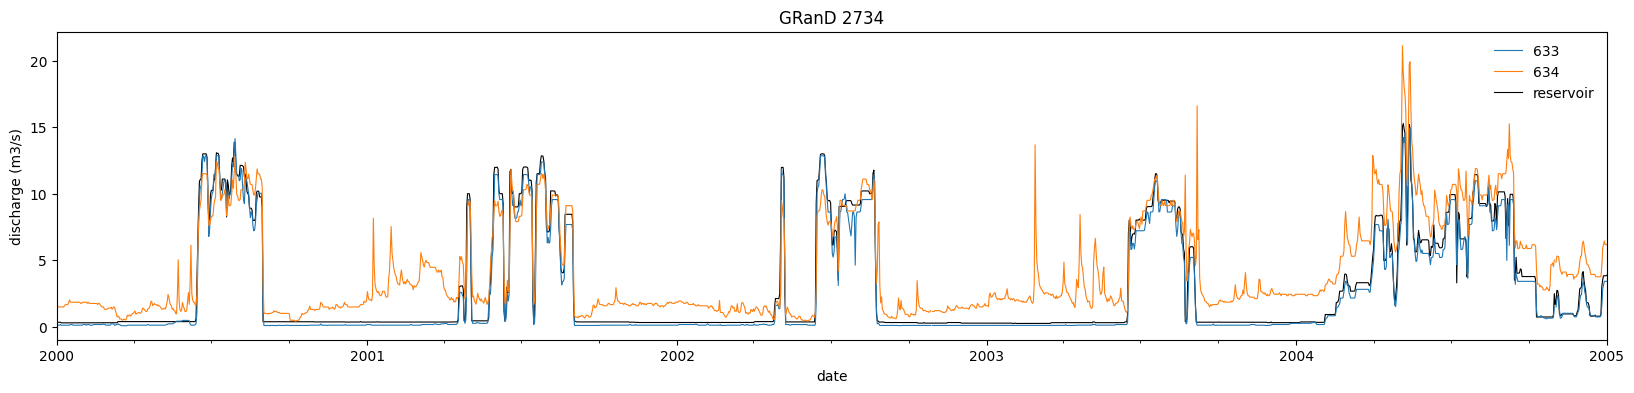

In [27]:
grand_id = 2734
efas_ids = [
    633, 
    634,
    # 645
]

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id not in discharge_24h:
        print(f'{efas_id} not in time series')
        continue
    discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
if grand_id in release:
    release[grand_id].loc[start:end].plot(ax=ax, c='k', lw=.8, label='reservoir', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title=f'GRanD {grand_id}'
);

* Station 633 is exactely the reservoir release.
* Station 634 is also affected by the reservoirs, but it includes a larger catchment were the low flows are not so clearly regulated.

**Remove station 633**.

#### Cinca: 3487

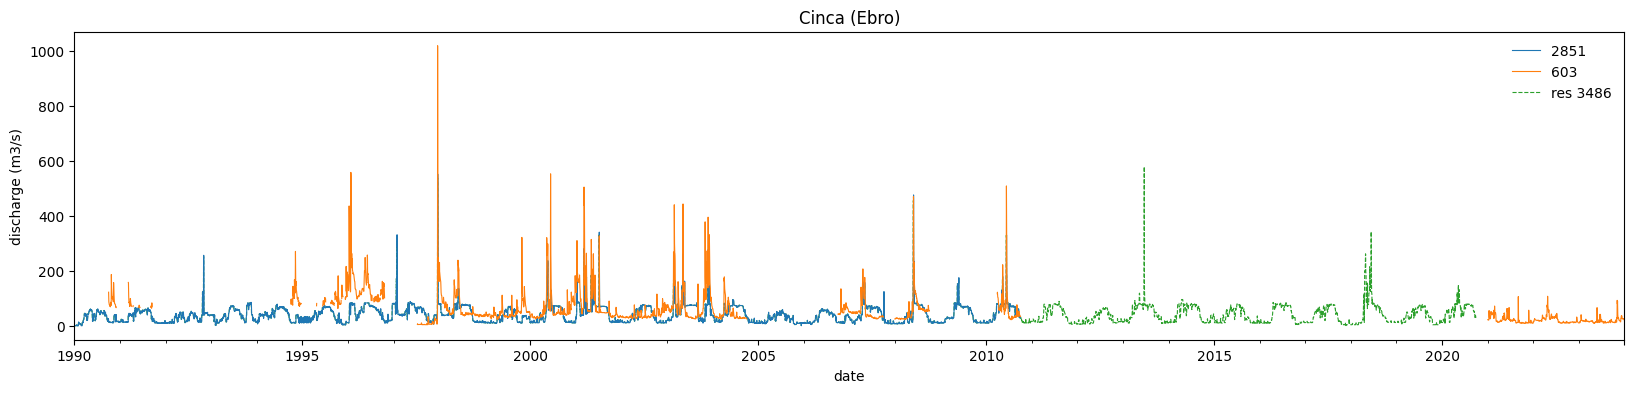

In [50]:
grand_ids = [
#     3481,
    3486,
#     # 3487,
]
efas_ids = [
#     2994,
    2851,
#     2858,
    # 654,
    603,
]

start = None #datetime(2000, 1, 1)
end = None #datetime(2005, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Cinca (Ebro)'
);

* Discharge in station 2994 is exactely the release of reservoir GRanD 3481.
* Discharge in station 2851 is exactely the release of reservoir GRanD 3486.
* Discharge in station 2858 is exactely the release of reservoir GRanD 3487.
* None of this reservoirs have a large degree of regulation (<=0.375), but the time series prove some regulation.
* The performance in EFAS5 was not too bad in the two reservoirs in the Cinca river (KGE 0.3 approx.), and good in the Ésera (KGE 0.6).

I will remove 2 stations:
* 2994, the one downstream the first reservoir the Cinca river. Calibrating the station 2851 seems enough for this upper stretch of the Cinca river before the junction with the Ésera.
* Station 2858 downstream the reservoir in the Ésera river. Even if the KGE in EFAS5 is good, calibrating the reservoir only can lead to wrong parameters as both inflows are already calibrated.

By the way, the station time series can be improved (filled gaps) using the reservoir release.

#### Noguera Pallaresa: 2933

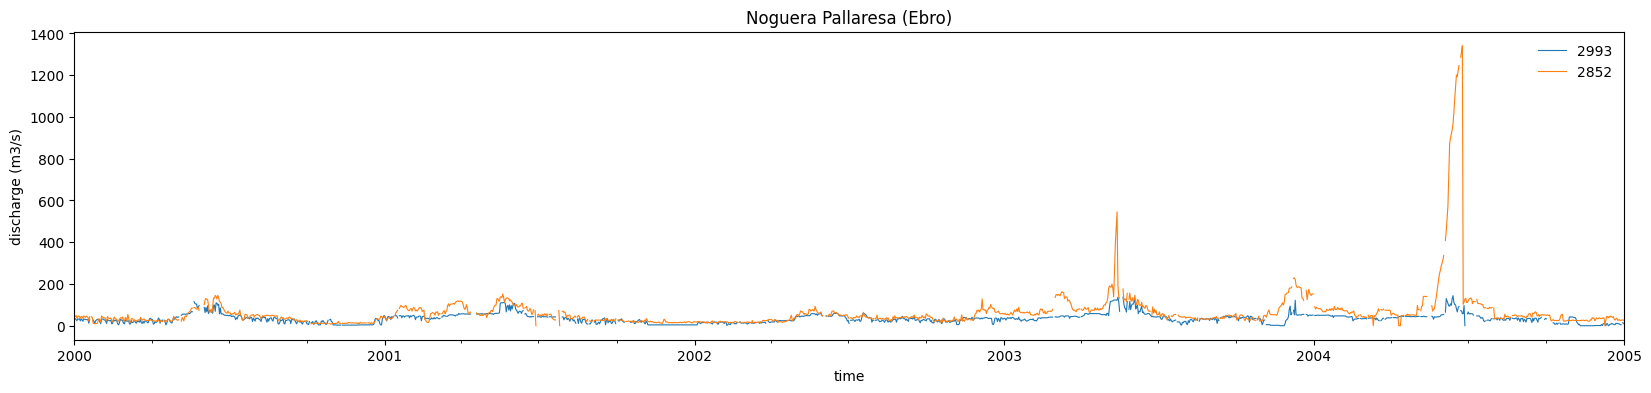

In [63]:
grand_ids = [
    # 3485
]
efas_ids = [
    # 4608,
    # 4615,
    # 627, 
    2993,
    2852,
]

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Noguera Pallaresa (Ebro)'
);

* The discharge in station 2993 is exactely the release of reservoir GRanD 3485, which has a relative low degree of regulation (0.215), but the time series is clearly affected by the reservoir.
* The performance in EFAS5 is relatively good (KGE 0.48).
* Station 627 would be a good alternative, but there's a large gap of data that prevents from using it.

I'll **keep station 2993**.

#### Noguera Ribagorzana: 624

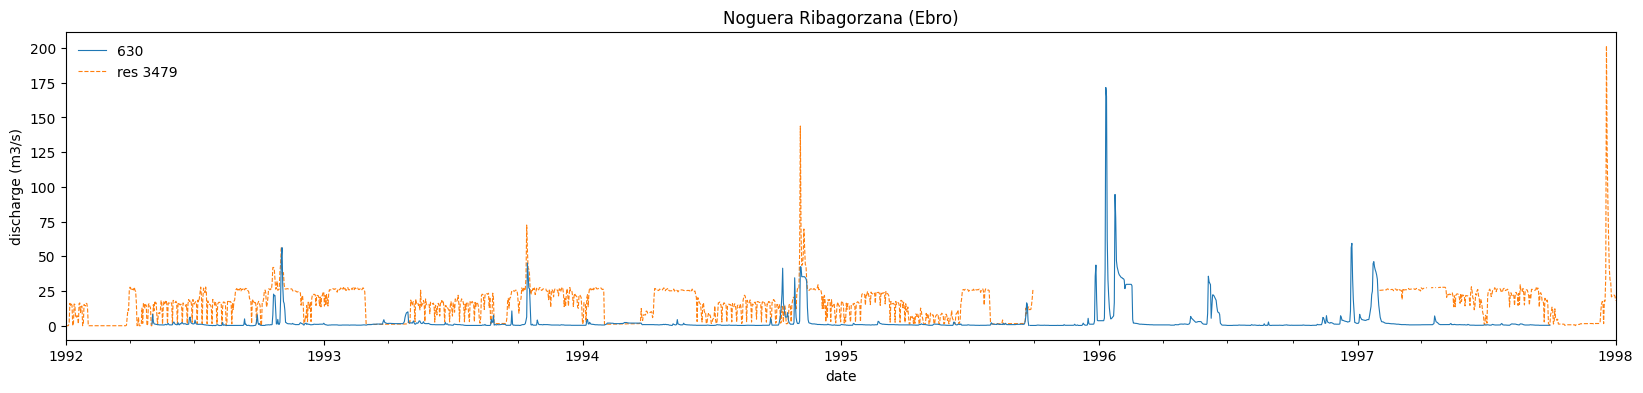

In [74]:
grand_ids = [
    3479,
    # 3499
]
efas_ids = [
    630,
    # 624,
    # 605
]

start = datetime(1992, 1, 1)
end = datetime(1998, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Noguera Ribagorzana (Ebro)'
);

* The river discharge in station 624 is smaller than the release from the reservoir. I have checked that part of the water is diverted through the Canal de Pinyana for irrigation and water supply.
* The KGE in EFAS5 was poor (0.11).

The **station 624 should not be used in the calibration**, as it will try to compensate this lack of water.

#### Segre: 617

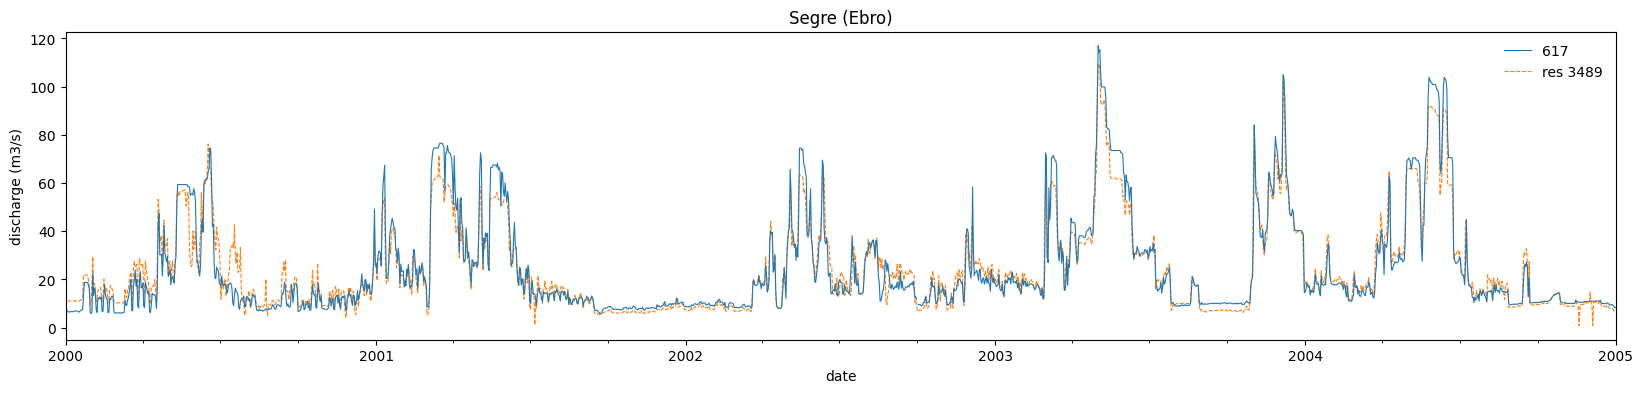

In [20]:
grand_ids = [
    3489
]
efas_ids = [
    # 629,
    617,
    # 2853,
]

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Segre (Ebro)'
);

* The discharge in station 617 is not exactely the release of reservoir 3489.
* The inflow (station 629) is calibrated.

**Remove station 617**.

#### Aragón: 626

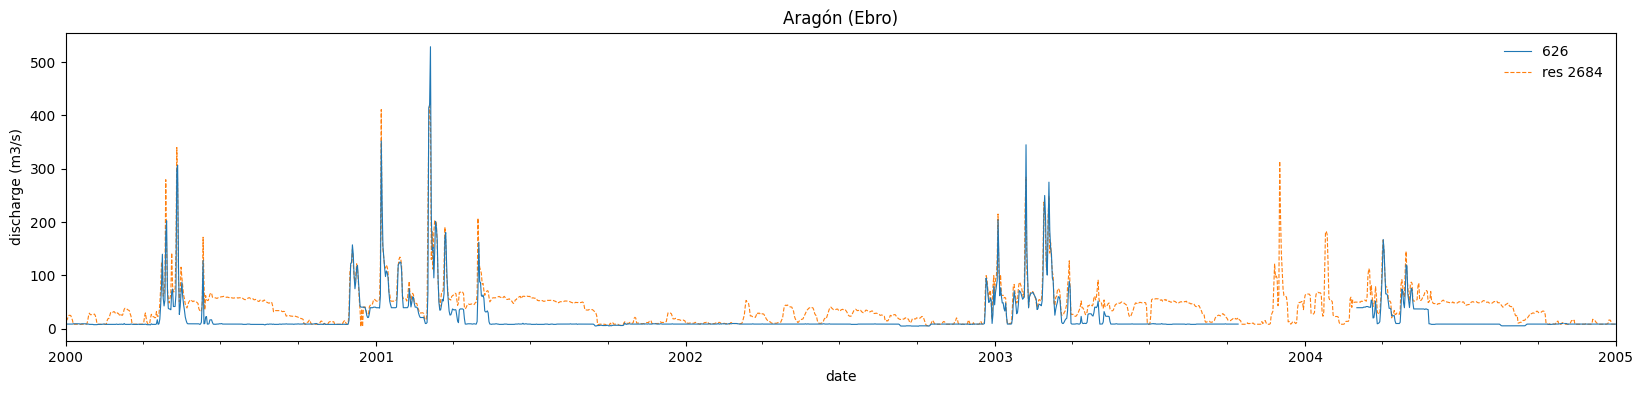

In [83]:
grand_ids = [
    2684
]
efas_ids = [
    # 2809,
    # 637,
    626
]

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Aragón (Ebro)'
);

* There's a loss of water between the reservoir release and the discharge in station 626 due to a diversion of water.

**Remove station 626**.

#### Guadalope: 628

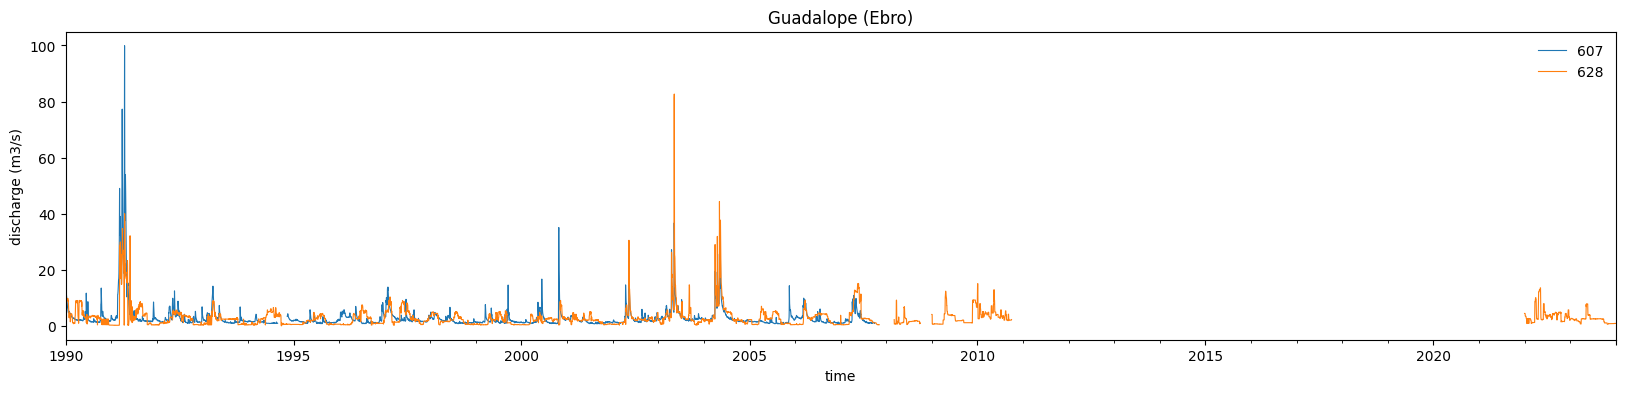

In [85]:
grand_ids = [
    2757
]
efas_ids = [
    607,
    628
]

start = None #datetime(2000, 1, 1)
end = None #datetime(2005, 1, 1)

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
for grand_id in grand_ids:
    if grand_id in release:
        release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadalope (Ebro)'
);

**Remove station 628** as the inflow to reservoir 2757 is already calibrated.

### Douro

#### Águeda: 1172

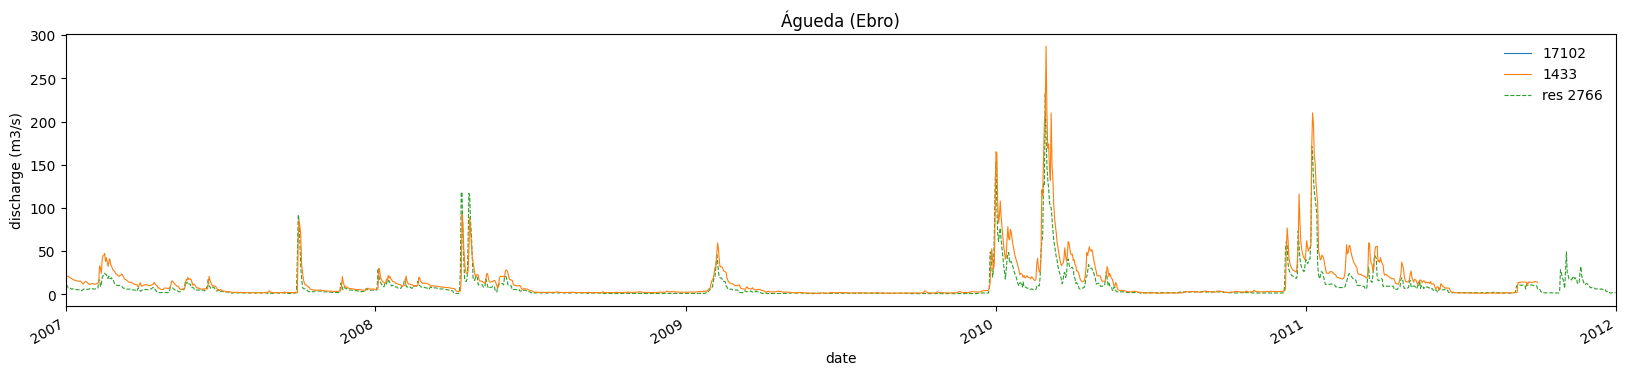

In [108]:
grand_ids = [
    2766
]
efas_ids = [
    17102,
    # 1172,
    1433
]

start = datetime(2007, 1, 1)
end = datetime(2012, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Águeda (Duero)'
);

* The length of the discharge time series in station 1172 is very short (2 years).
* The time series in station 1433 (downstream) fit well with the reservoir releases.

**Remove station 1172**

#### Duratón: 1183

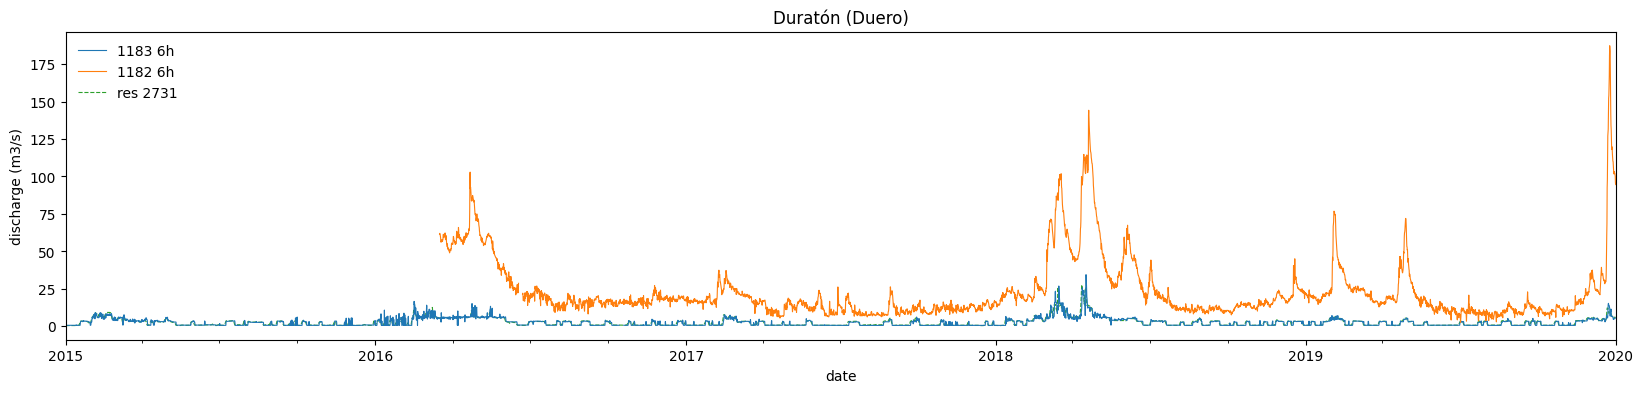

In [11]:
grand_ids = [
    2731
]
efas_ids = [
    # 17134,
    1183,
    1182
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    # if efas_id in discharge_24h:
    #     try:
    #         discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
    #     except:
    #         continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Duratón (Duero)'
);

* The discharge in station 1183 is almost exactely the release of reservoir 1863, whose degree of regulation is relativeley low (0.255), but clearly regulates the streamflow.
* The KGE in EFAS5 was relatively poor (0.11).
* The discharge in station 1182 (further downstream) is more natural and more suitable to calibrate.

#### Órbigo: 17152

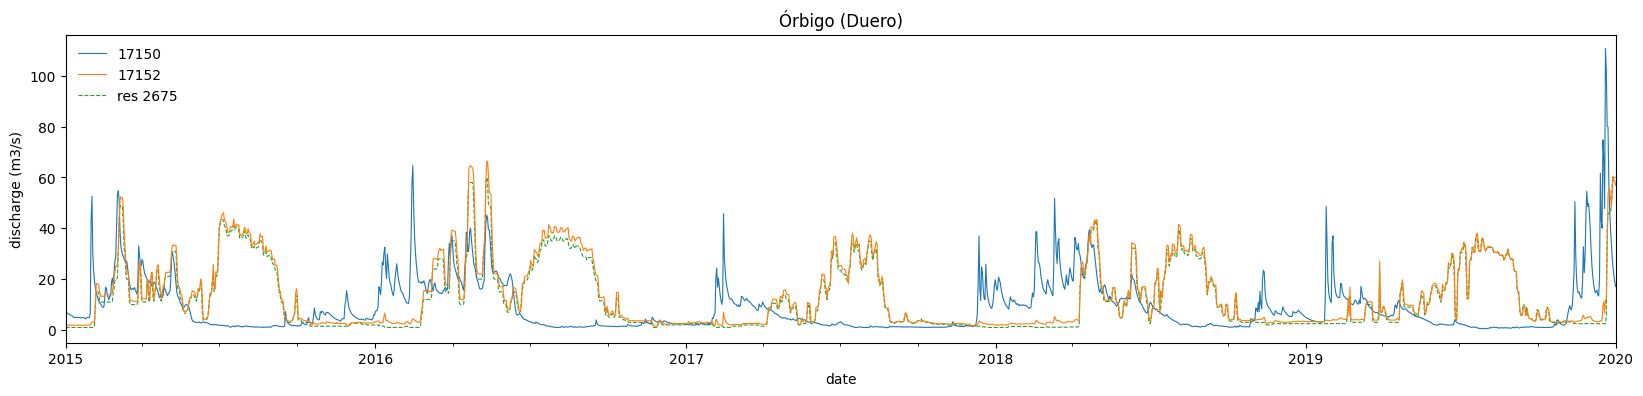

In [15]:
grand_ids = [
    2675
]
efas_ids = [
    17150,
    17152
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Órbigo (Duero)'
);

**Remove station 17152** as its river discharge is almost the same as the reservoir release, and the reservoir inflow is calibrated.

#### Riaza: 17168

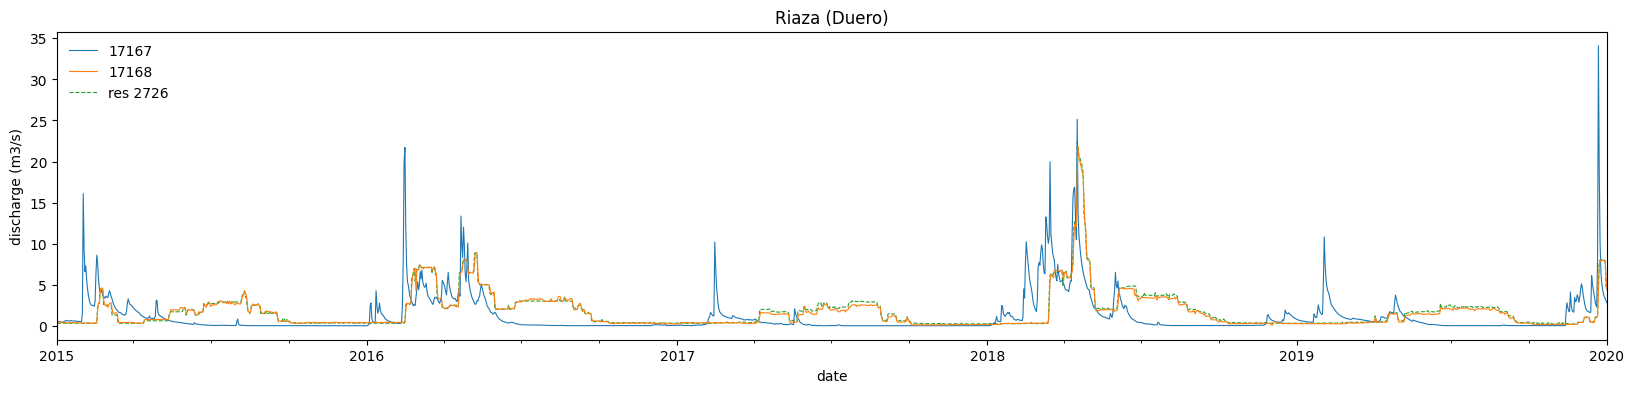

In [16]:
grand_ids = [
    2726
]
efas_ids = [
    17167,
    17168
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Riaza (Duero)'
);

> **Note**. The station is located upstream of the reservoir!!!

**Remove station 17168** as it represents the reservoir release, which clearly regulates the inflow (station 16167). Besides, the station is located upstream the reservoir.

#### Duero: 3012

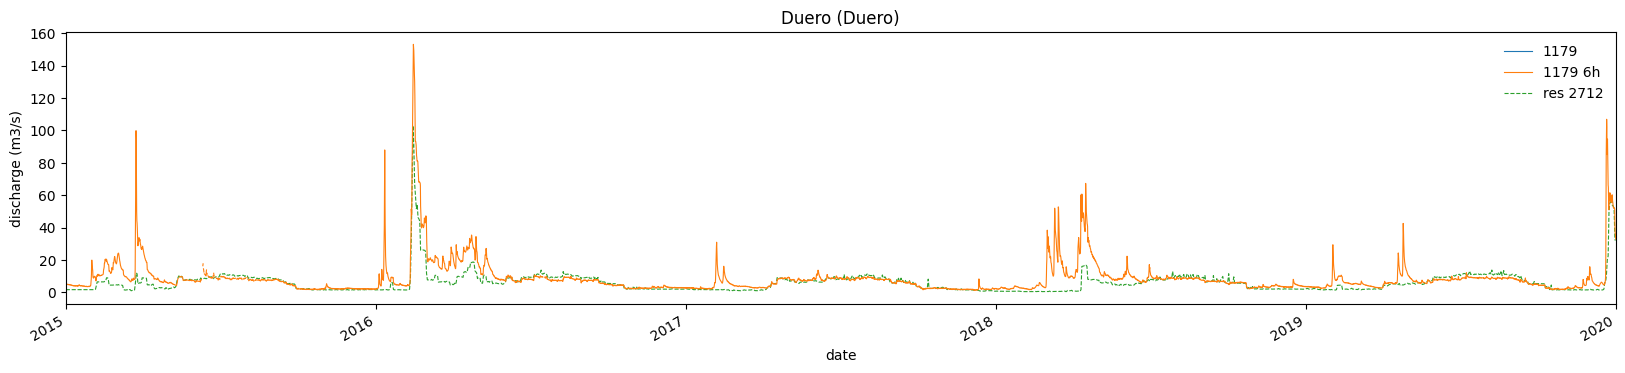

In [33]:
grand_ids = [
    2712
]
efas_ids = [
    # 3012,
    1179
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Duero (Duero)'
);

* The discharge in station 3012 represents the reservoir release, which has a high degree of regulation (1.815 years). KGE in EFAS5 was relatively poor (0.10).

**Remove station 3012** as it is the release of a highly regulated reservoir. Use, instead, the station 1179 which also includes two unregulated tributaries

#### Tormes: 3017

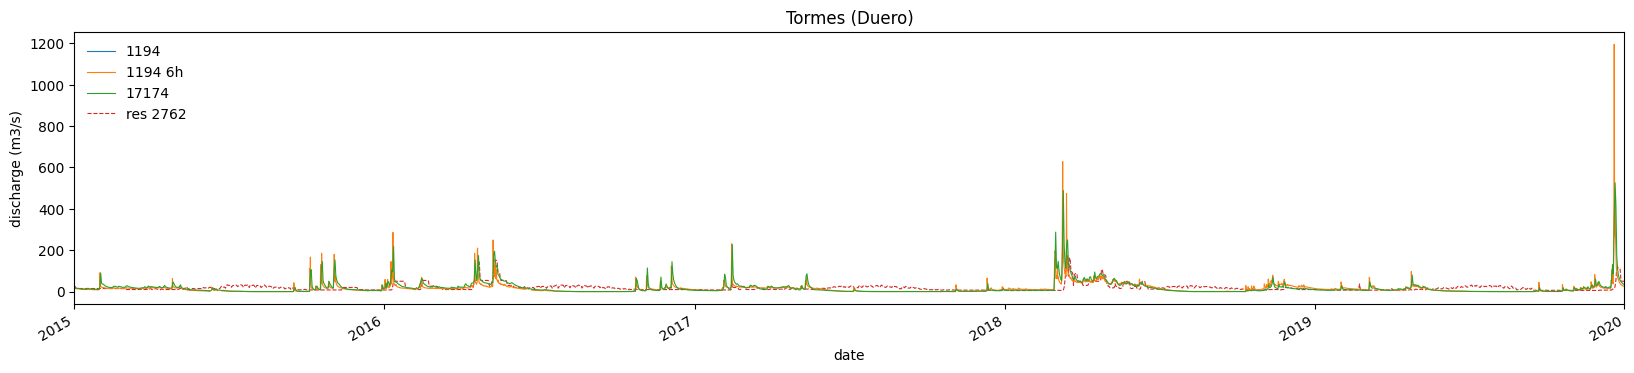

In [37]:
grand_ids = [
    2762
]
efas_ids = [
    1194,
    17174,
    # 3017
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Tormes (Duero)'
);

* The river discharge in station 3017 is the reservoir release. Despite that, the KGE in EFAS 5 was relatively good (0.32)

**Remove station 3017**, as the inflow into the reservoir (station 17174) is also a calibration point.

### Guadalquivir

#### Guadalimar: 969, 2992, 2834, 2835 

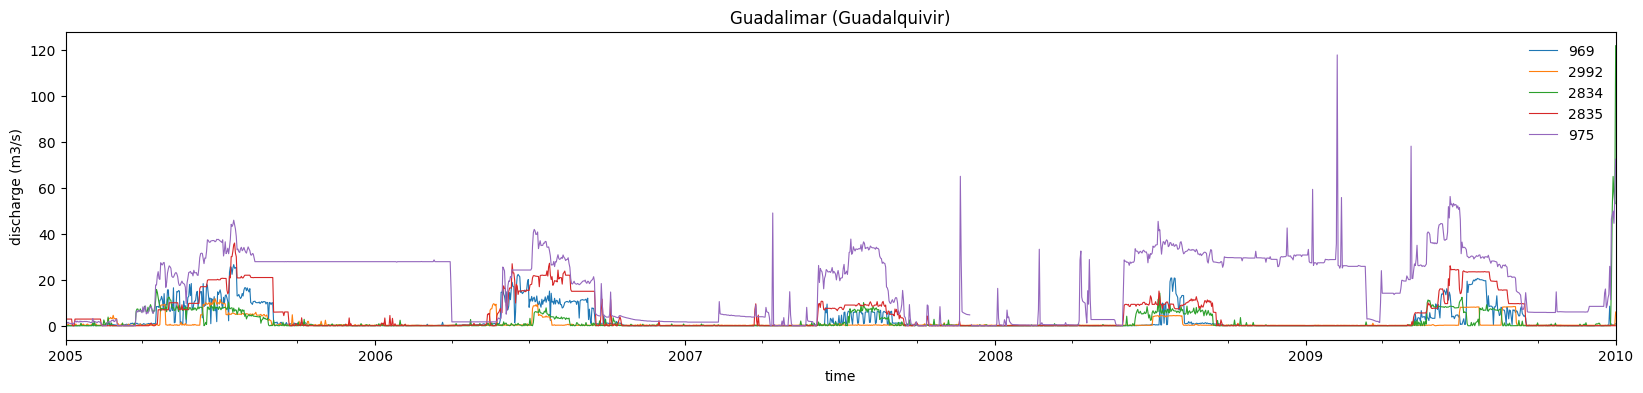

In [53]:
grand_ids = [
    # 92850,
    # 2860,
    # 2864,
    # 2868
]
efas_ids = [
    969,
    2992,
    2834,
    2835,
    975
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    # if efas_id in discharge_6h:
    #     try:
    #         discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
    #     except:
    #         continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadalimar (Guadalquivir)'
);

* The river discharge in station 2992 is exactely the reservoir release from 2860. KGE in EFAS5 is -0.06.
* The river discharge in station 2834 is exactely the reservoir release from 2864. KGE in EFAS5 is 0.72.
* The river discharge in station 2835 is exactely the reservoir release from 2868. KGE in EFAS5 is 0.51.
* Station 975, downstream all 3 reservoirs, has a KGE in EFAS5 0.10. The subcatchment is very small and all 3 inflows are controlled by the calibration of the 3 stations above.

**Remove the three stations in the reservoir outlets and calibrate station 975**.

#### Yegüas: 2838

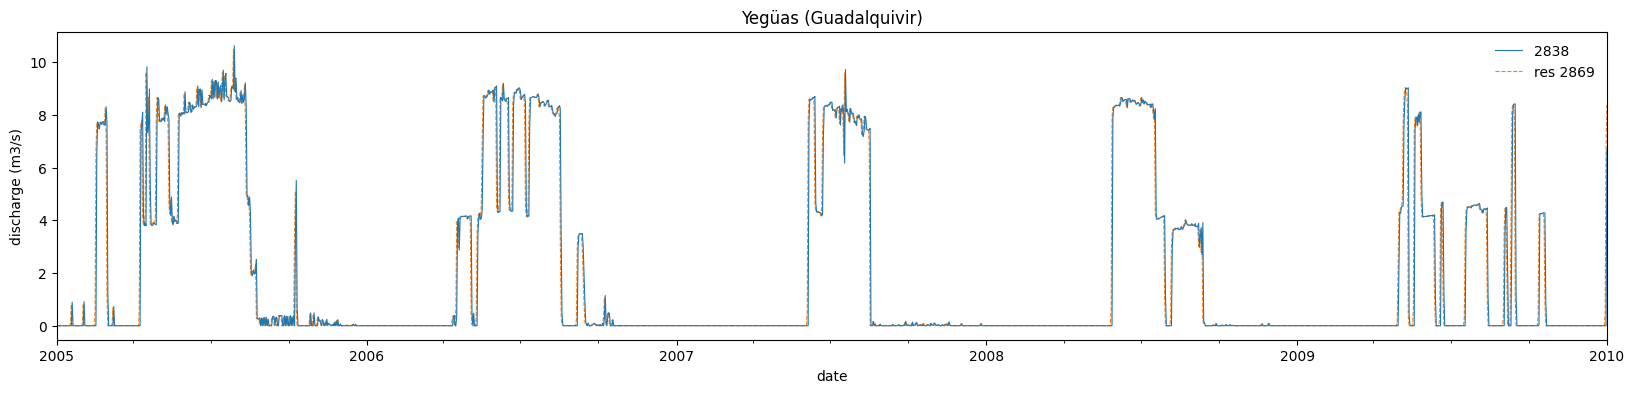

In [55]:
grand_ids = [
    2869
]
efas_ids = [
    2838
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Yegüas (Guadalquivir)'
);

* The river discharge in station 2838 is exactely the reservoir release from 2869. This point was not calibrated in EFAS5.
* The reservoir parameters were calibrated: KGE of 0.43 in outflow and 0.34 in storage.

**Keep the station as there isn't any other calibration point in that tributary**.

#### Guadalmellato: 2840

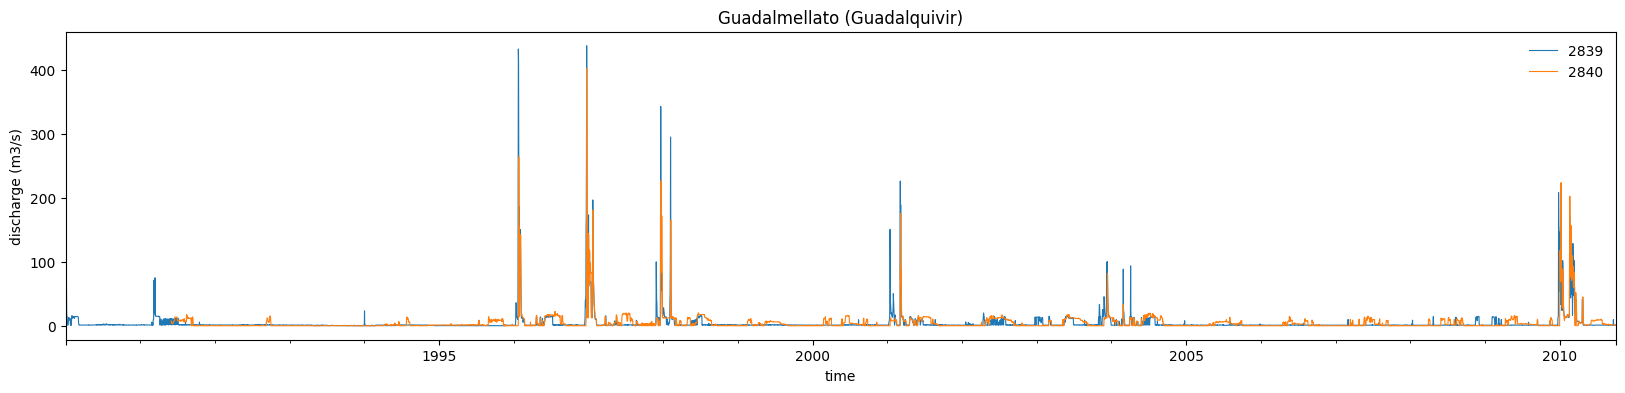

In [66]:
grand_ids = [
    # 2870,
    # 2873
]
efas_ids = [
    # 3062,
    2839,
    2840
]

start = datetime(1995, 1, 1)
end = datetime(2000, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadalmellato (Guadalquivir)'
);

* The river discharge in station 2839 is exactely the reservoir release from 2870. This station was not calibrated in EFAS5. 
* The river discharge in station 2840 is exactely the reservoir release from 2873. This station was wrongly located in EFAS5 between reservoirs 2870 and 2873; despite that, its KGE is very good (0.72).
* Reservoir 2870 was calibrated and obtained KGEs of 0.47 in outflow and 0.42 in storage.
* Reservoir 2873 was calibrated and obtained KGEs of 0.51 in outflow and 0.35 in storage.

**Keep station 2840, as there isn't any other calibration point in that tributary**.

#### Guadajoz: 2841

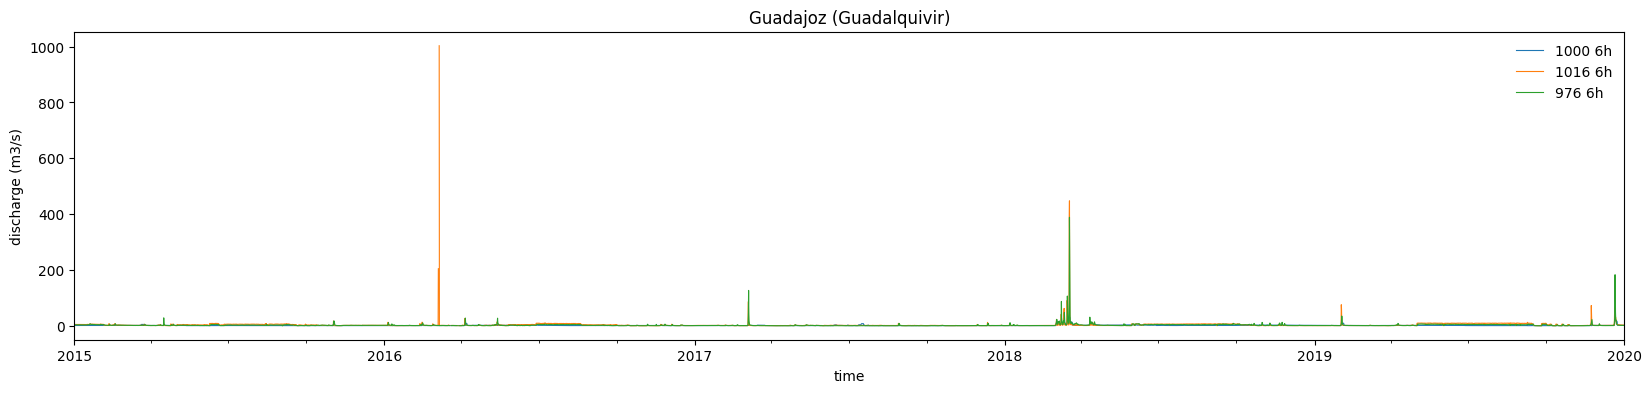

In [82]:
grand_ids = [
    # 2894
]
efas_ids = [
    1000,
    3066,
    3065,
    2841,
    1016,
    976
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadajoz (Guadalquivir)'
);

* The river discharge in station 2841 is exactely the reservoir release from 2894. KGE in EFAS5 is 0.62.
* Reservoir 2894 has been calibrated: KGE 0.67 in outflow and 0.73 in storage.
* There are two stations (1016 and 976) downstream in the same river that could be used for calibration

**Remove station 2841** and calibrate one or both stations downstream: possibly 976.

#### Guadiato: 2842

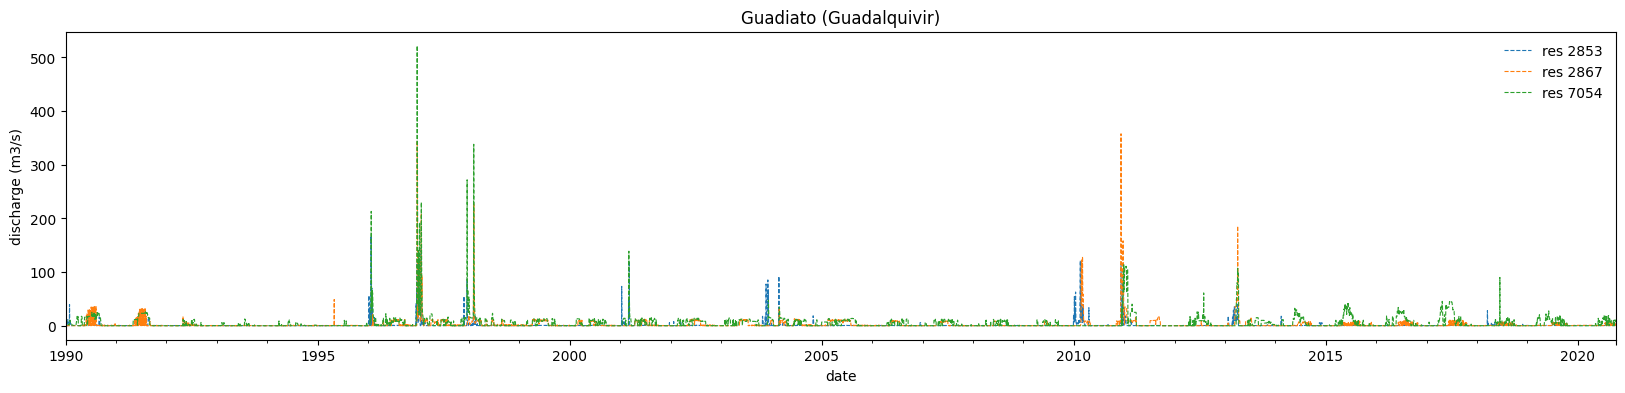

In [87]:
grand_ids = [
    2853,
    2867,
    7054
]
efas_ids = [
    # 2842,
    # 2987
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadiato (Guadalquivir)'
);

* The river discharge in station 2842 is exactely the reservoir release from 2867. KGE in EFAS5 is 0.60.
* The river discharge in station 2987 is exactely the reservoir release from 7054. KGE in EFAS5 is 0.48, but it is not selected for calibration in EFAS6.
* Reservoir 2853 was calibrated with KGEs 0.53 in outflow and -0.45 in storage.
* Reservoir 2867 was calibrated with KGEs 0.35 in outflow and 0.43 in storage.
* Reservoir 7054 was calibrated with KGEs 0.10 in outflow and -0.08 in storage.

**Keep station 2842 as it is the best performing station in the subcatchment**.

#### Bembézar: 2843

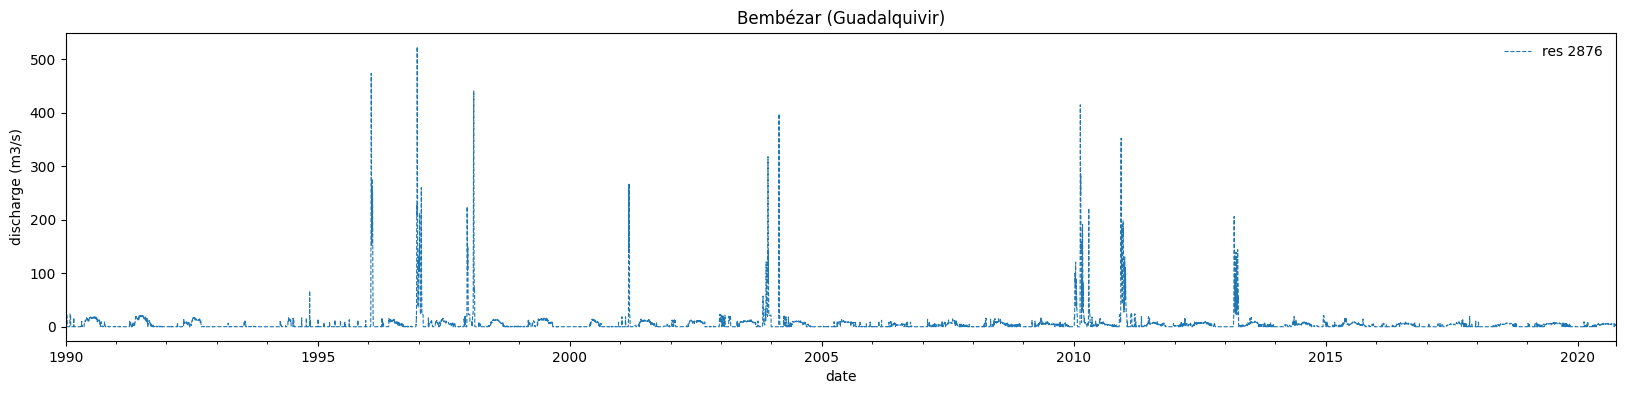

In [89]:
grand_ids = [
    2876
]
efas_ids = [
    3063,
    3064,
    # 2843
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Bembézar (Guadalquivir)'
);

* The river discharge in station 2843 is exactely the reservoir release from 2876. KGE in EFAS5 is 0.78.
* Reservoir 2876 was calibrated: KGE 0.44 in outflow and 0.36 in storage.

**Keep station as there isn't any other calibration point in the subcatchment**.

#### Huelva: 2848

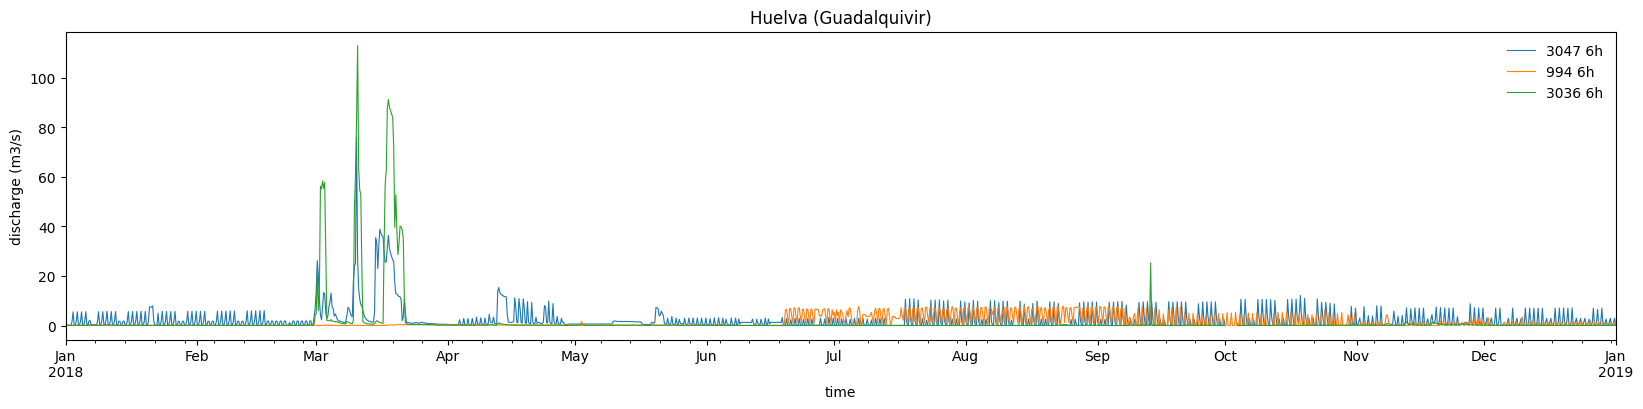

In [99]:
grand_ids = [
    # 2875,
    # 2885,
    # 2893
]
efas_ids = [
    3047,
    2848,
    994,
    3036
]

start = datetime(2018, 1, 1)
end = datetime(2019, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Huelva (Guadalquivir)'
);

* The river discharge in station 2848 is exactely the reservoir release from 2885. KGE in EFAS5 is 0.68.
* Reservoir 2885 was calibrated: KGEs 0.33 in outflow and 0.65 in storage.
* Reservoir 2875 (upstream) was calibrated: KGEs 0.17 in outflow and 0.43 in storage.
* Reservoir 2893 (downstream) was not calibrated.

**Doubt. Consider using station 3036 instead of 2848**.

### Guadiana

#### Zújar: 3011, 2859

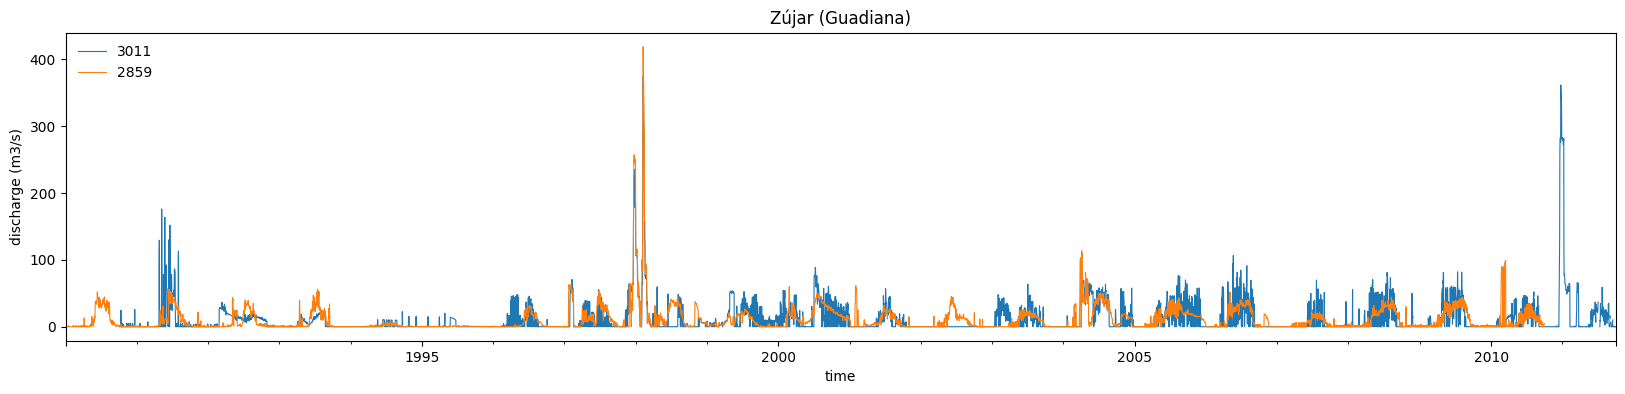

In [111]:
grand_ids = [
    # 2833,
    # 2832
]
efas_ids = [
    # 5174,
    # 5175,
    # 5176,
    # 5177, 
    # 5178,
    3011,
    2859,
    # 5179,
    # 2783
]

start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Zújar (Guadiana)'
);

* The river discharge in station 3011 is exactely the reservoir release from 2833. KGE in EFAS5 is 0.37.
* Reservoir 2833 was modelled as a lake in EFAS5. It hasn't been calibrated.
* The river discharge in station 2859 is exactely the reservoir release from 2832. KGE in EFAS5 is -0.10.
* Reservoir 2832 has not been calibrated.
* There are 5 stations monitoring all the flows into the reservoir, but their time series is too short.
* The station 2783 (downstream) has values that don't agree with the releases from the reservoir (not reliable).

**Remove station 3011 and calibrate station 2859**, as the observed data is less noisy.

#### Guadiana: 3010, 3008, 2860

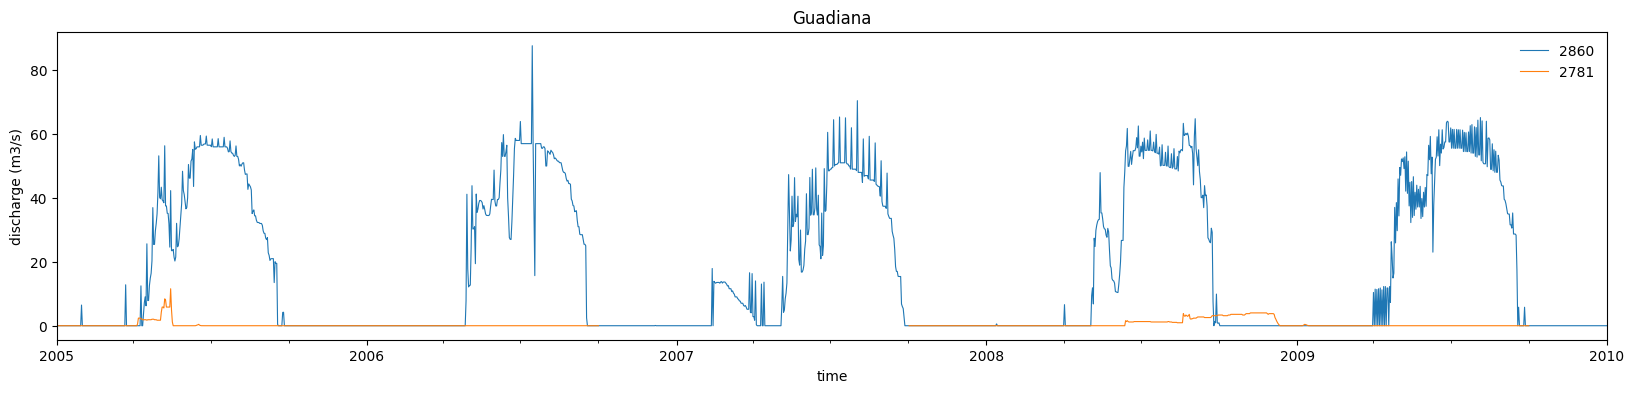

In [130]:
grand_ids = [
    # 2811,
    # 2822,
    # 2830,
]
efas_ids = [
    # 5169,
    # 5170,
    # 5171,
    # 5172,
    # 5173,
    # 3010,
    # 3008,
    2860,
    # 10266,
    2781
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadiana'
);

* The river discharge in station 3010 is exactely the reservoir release from 2811. KGE in EFAS5 is 0.44. Reservoir 2811 has been calibrated: KGEs 0.25 in outflow and 0.39 in storage.
* The river discharge in station 3008 is exactely the reservoir release from 2822. KGE in EFAS5 is 0.36. Reservoir 2822 was modelled both as a reservoir and a lake in EFAS5; it hasn't been calibrated.
* The river discharge in station 2860 is exactely the reservoir release from 2830. KGE in EFAS5 is 0.38. Reservoir 2860 hasn't been calibrated.
* There are 5 gauging stations monitoring the inflows, but the time series starts in Autumn 2021.
* The station 2781 (dowsntream) shows a discharge not coherent with the release from the reservoir upstream. This difference might be explained by the diversion of water form the reservoir by the _Canal de Orellana_.

**Keep the three stations as there isn't a better option**.

### Júcar

#### Júcar: 4308

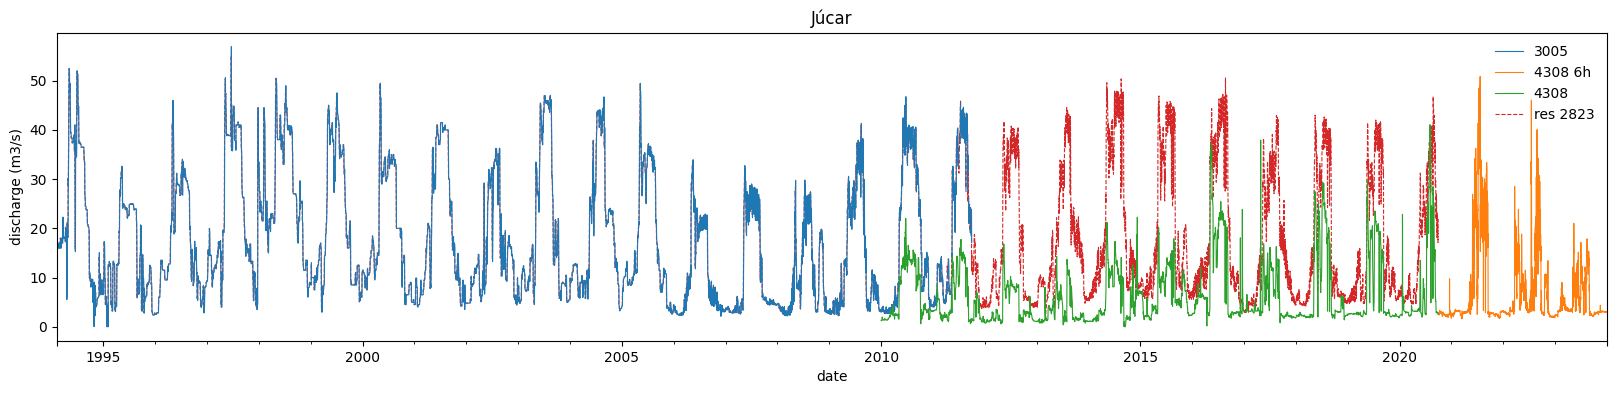

In [176]:
grand_ids = [
    2823
]
efas_ids = [
    # 2785,
    3005,
    # 4312,
    4308
]

start = datetime(2010, 1, 1)
end = None #datetime(2020, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    if efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Júcar'
);

* The discharge in station 4308 is smaller than the release of reservoir 2823, as part of the water is diverted.
* The station 3005 is exactely the reservoir release. It would be a better option.

**Remove station 4308**.

#### Mijares: 4328

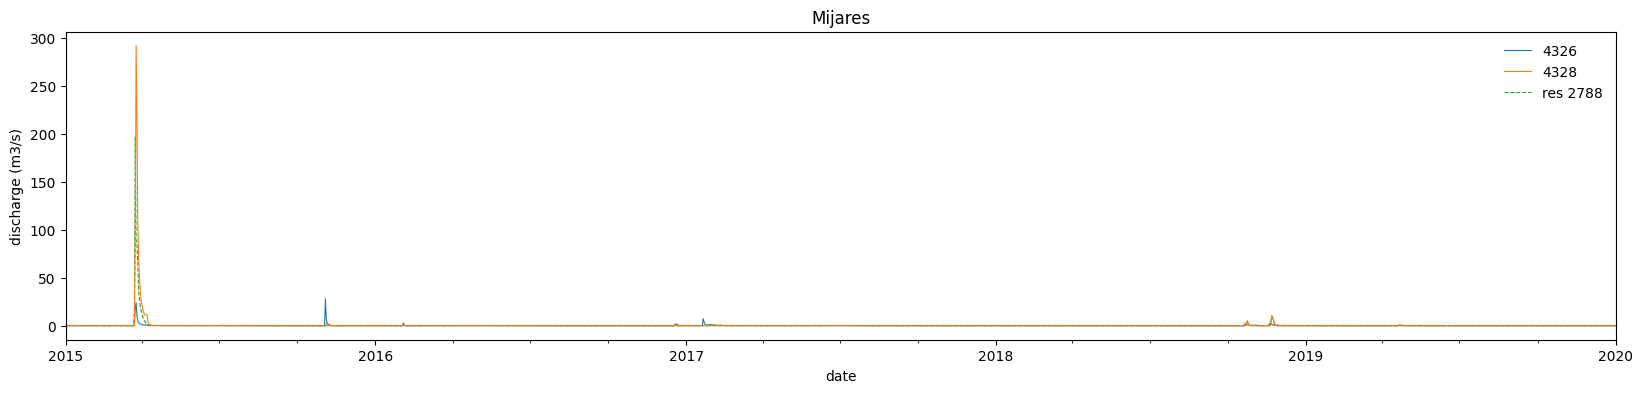

In [153]:
grand_ids = [
    2788
]
efas_ids = [
    4326,
    4328
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Mijares'
);

**Keep station 4328**.

### Catalunya

#### Muga: 4462

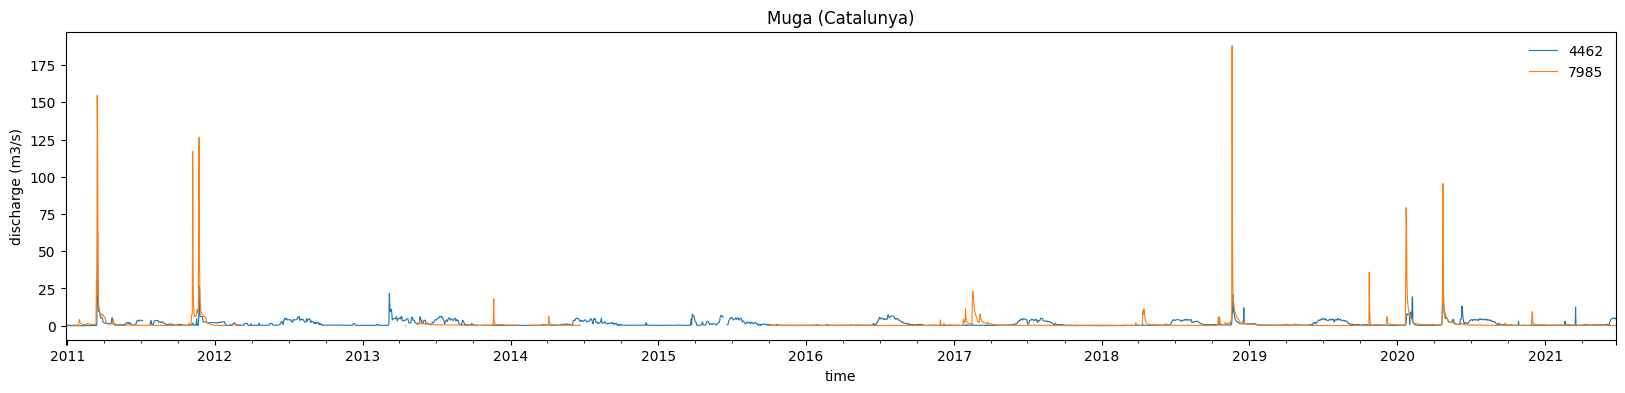

In [156]:
grand_ids = [
    3478
]
efas_ids = [
    4461,
    4462,
    7985
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Muga (Catalunya)'
);

**Remove station 4462 and calibrate 7985**.

#### Llobregat: 4477

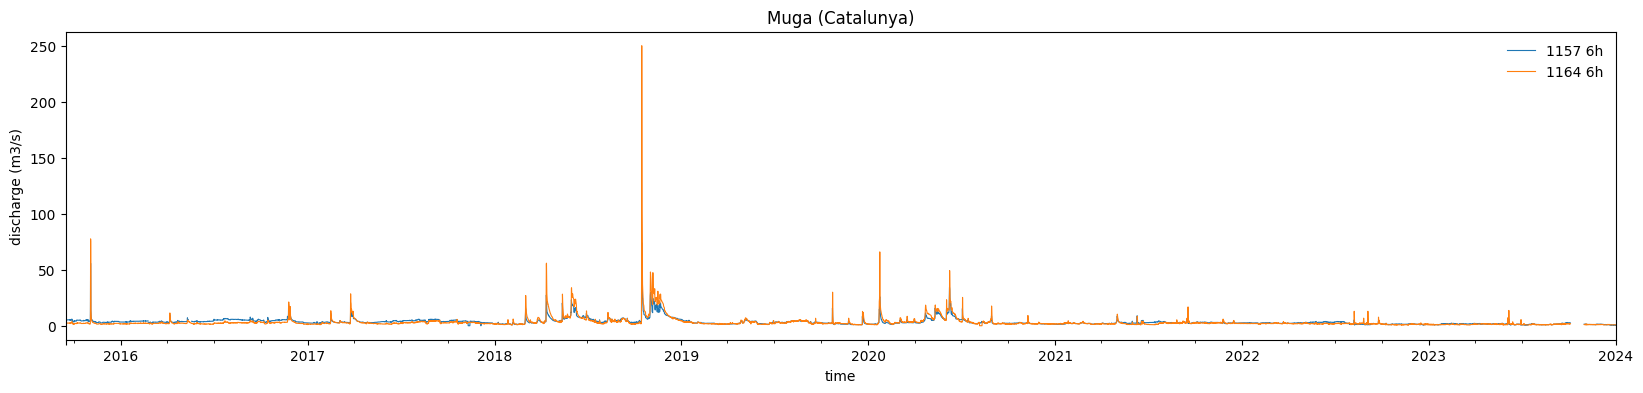

In [181]:
grand_ids = [
    3495
]
efas_ids = [
    # 8017,
    4477,
    1157,
    1164
]

start = datetime(2015, 1, 1)
end = datetime(2020, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Muga (Catalunya)'
);

**Remove station 4477** as there are two stations downstream (1157, 1164).

### Minho

#### Sil: 2982, 2986

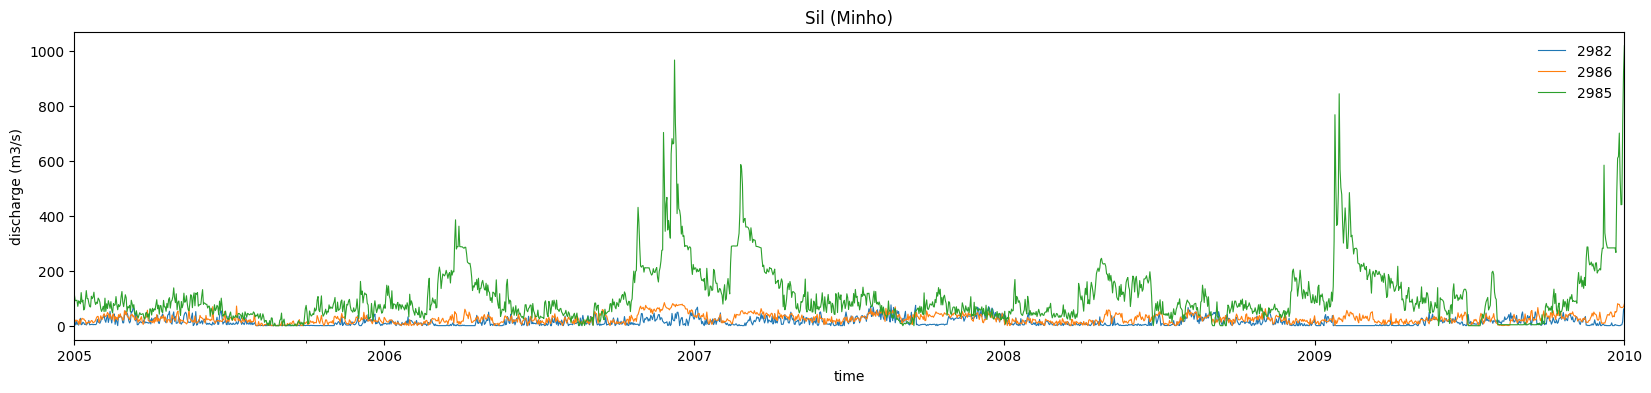

In [162]:
grand_ids = [
    # 2703,
    # 2697
]
efas_ids = [
    2982,
    2986,
    2985
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Sil (Minho)'
);

* The riser discharge in station 2982 is exactely the release from reservoir 2703. KGE in EFAS5 is -0.32. The reservoir has been calibrated with KGEs 0.08 in outflow and 0.6 in storage.
* The riser discharge in station 2986 is exactely the release from reservoir 2697. KGE in EFAS5 is 0.15. The reservoir has been calibrated with KGEs 0.55 in outflow and 0.09 in storage.
* The station 2985 (downstream) is not directly affected by reservoirs and performed well in EFAS5 (KGE 0.65).

**Remove stations 2982 and 2986** and calibrate station 2985.

#### Minho: 2983

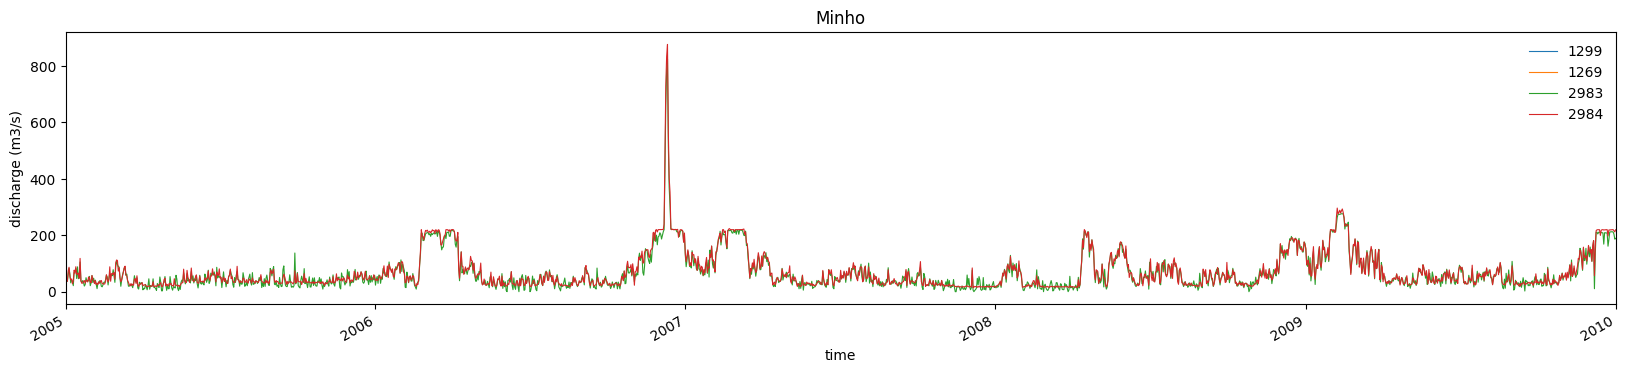

In [191]:
grand_ids = [
    # 2683
]
efas_ids = [
    1299,
    1269,
    2983,
    2984
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Minho'
);

* The river discharge in station 2983 is exactely the release of reservoir 2683. The KGE in EFAS is very good (0.73). This reservoir was calibrated: KGES 0.77 outflow and 0.52 storage.
* Two calibration stations (1299, 1269) monitor the inflows.
* There's another station further downstream (2984), also calibrated in EFAS5 with very good performance (0.74).

**Remove station 2683** as the inflows are calibrated and the river discharge is exactely the reservoir release. 

### Segura

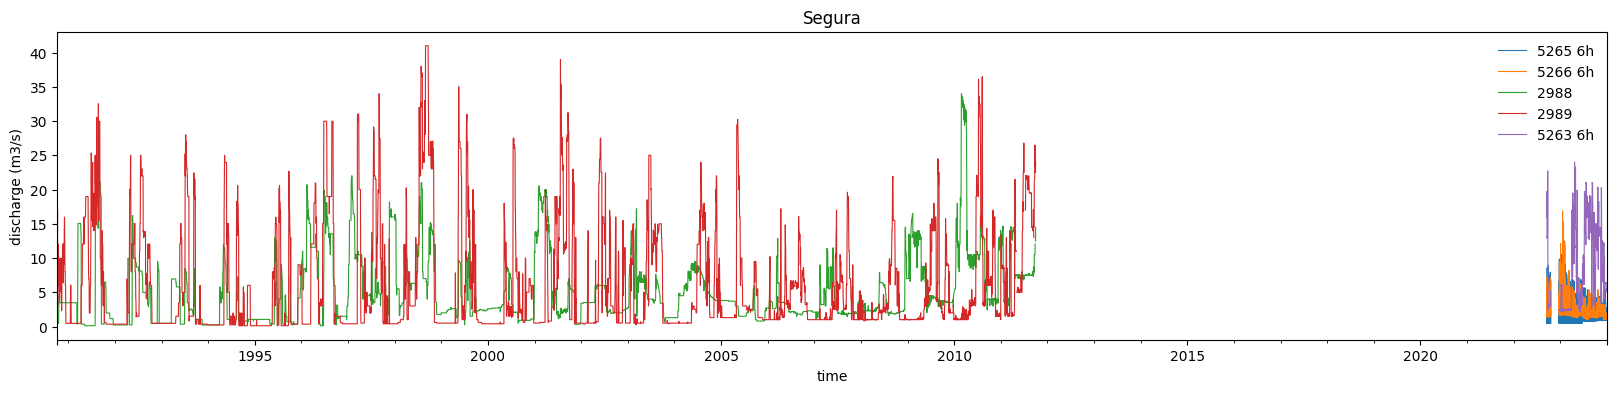

In [200]:
grand_ids = [
    # 2848,
    # 2849
]
efas_ids = [
    5265,
    5266,
    2988,
    2989,
    5263,
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Segura'
);

* The river discharge in station 2988 is exactely the release from reservoir 2848. The KGE in EFAS5 is very good (0.74). The reservoir has been calibrated: KGEs of 0.56 for outflow and 0.50 for storage.
* The river discharge in station 2989 is exactely the release from reservoir 2849. The KGE in EFAS5 is poor (-0.06). The reservoir has been calibrated: KGEs of 0.05 for outflow and 0.40 for storage.
* There are other stations upstream and downstream, but the length of the time series is too short.

**Keep both stations as there isn't a better option**.

### Tagus

#### Alberche: 2996

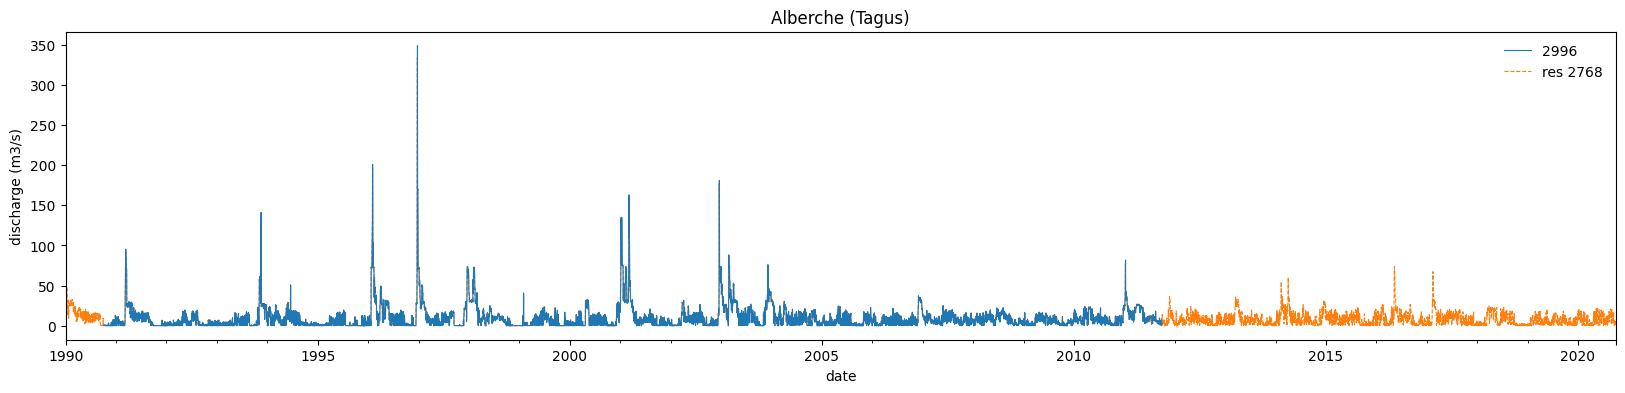

In [203]:
grand_ids = [
    2768
]
efas_ids = [
    2996
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Alberche (Tagus)'
);

* The river discharge in station 2996 is the release from reservoir 2768. The performance in EFAS5 is KGE 0.17. The reservoir has been calibrated with KGE 0.39 in outflow and 0.59 in storage.

**Keep station as there is no other option**.

### Alagón: 2999

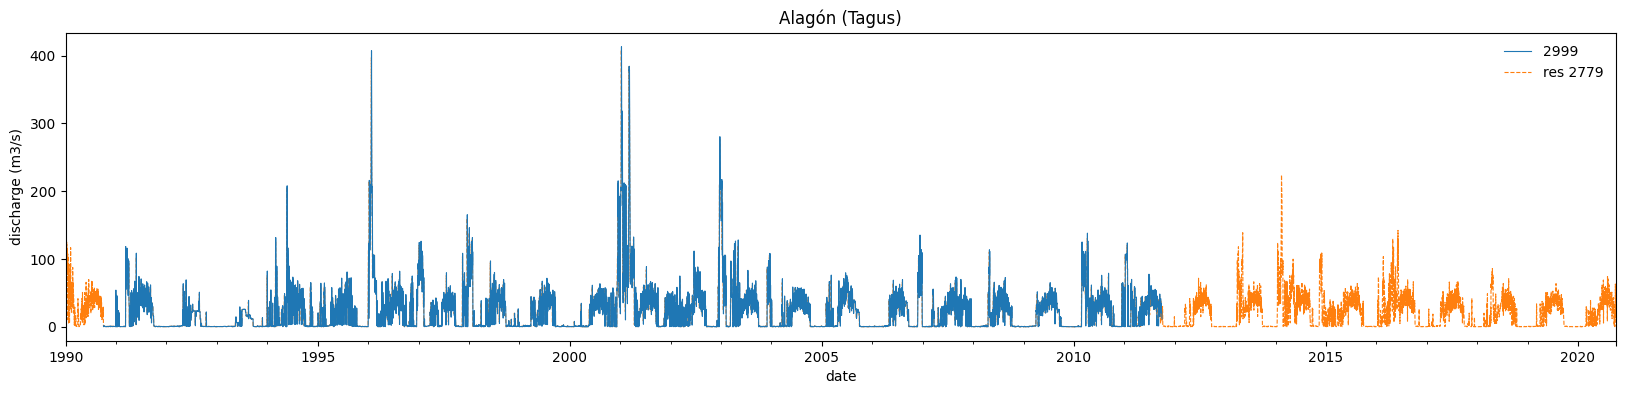

In [204]:
grand_ids = [
    2779
]
efas_ids = [
    2999
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Alagón (Tagus)'
);

* The river discharge in station 2999 is exactely the release from reservoir 2779. The performance in EFAS5 is KGE 0.14. This reservoir has been calibrated with KGE 0.19 for outflow and 0.42 for storage.

**Keep station as there isn't any other option**.

#### Lozoya: 3001

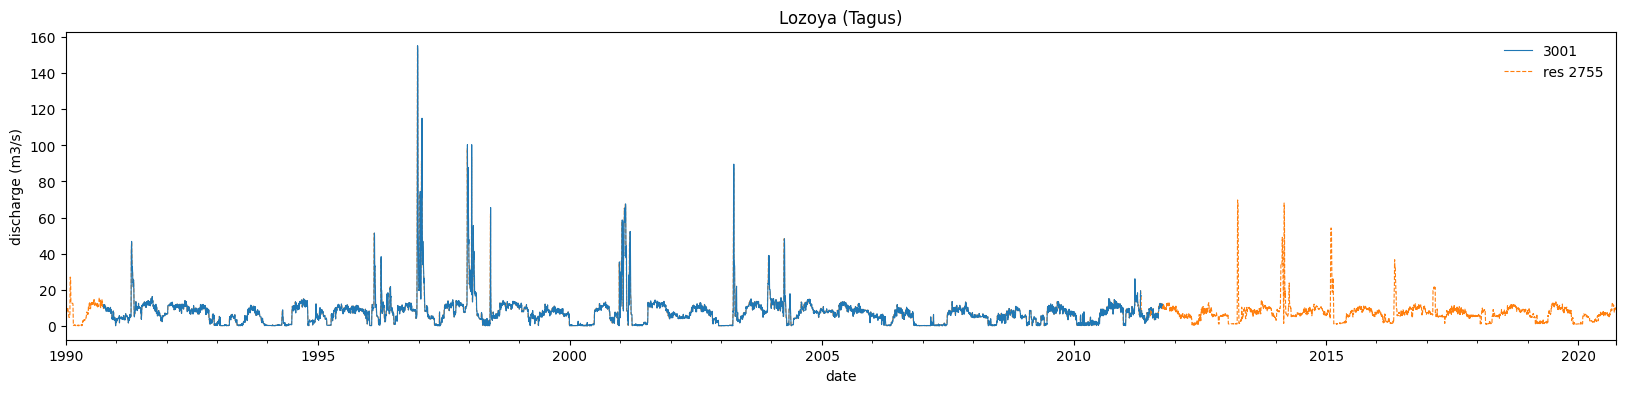

In [205]:
grand_ids = [
    2755
]
efas_ids = [
    3001
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Lozoya (Tagus)'
);

* The river discharge in station 3001 is exactely the release from reservoir 2755. The performance in EFAS5 is KGE 0.33. This reservoir has been calibrated with KGE 0.21 for outflow and 0.07 for storage.

**Keep station as there isn't any other option**.

#### Guadiela: 3002

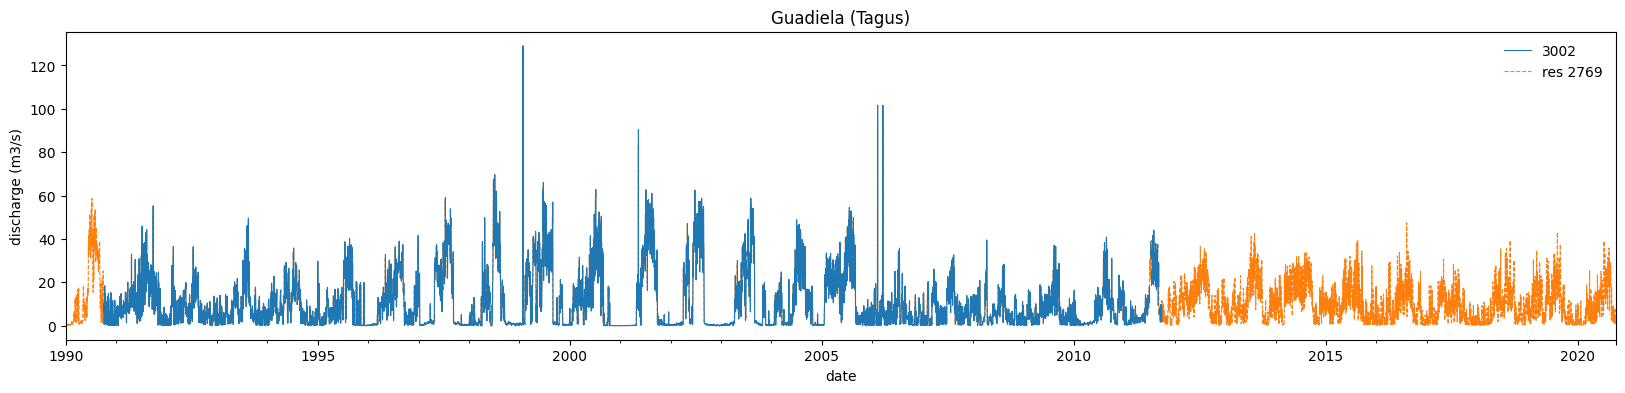

In [206]:
grand_ids = [
    2769
]
efas_ids = [
    3002
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Guadiela (Tagus)'
);

* The river discharge in station 3002 is exactely the release from reservoir 2769. The performance in EFAS5 is KGE -0.10. This reservoir has been calibrated with KGE -0.05 for outflow and -0.03 for storage.

**Remove station 3002** as this reservoir is used to divert water to the Segura basin, and modelling its release downstream will suffer from a negative bias.

#### Tagus

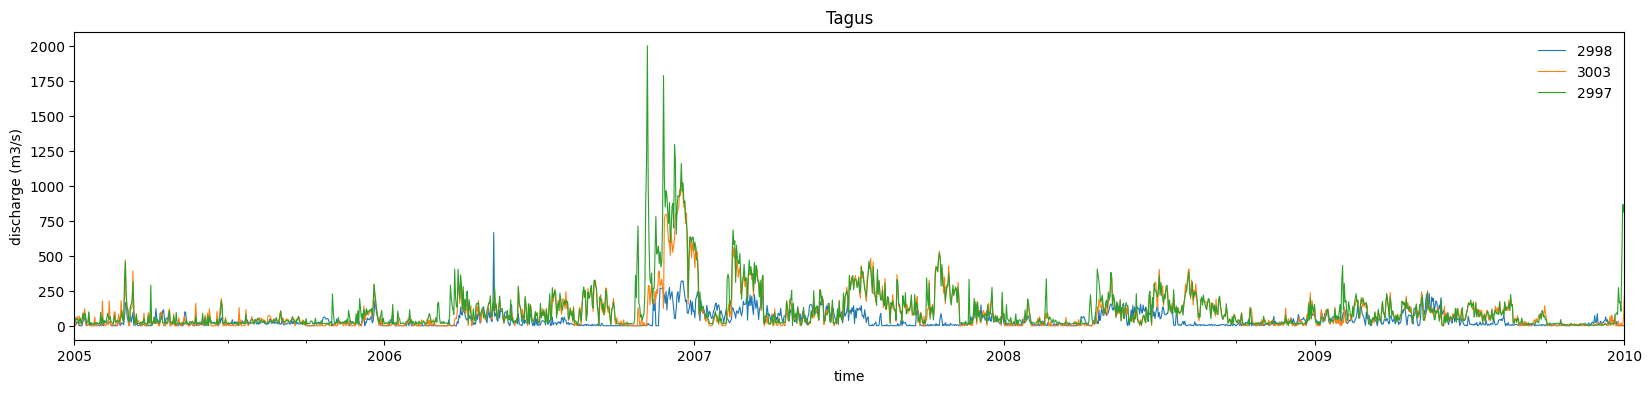

In [211]:
grand_ids = [
    # 2798,
    # 2797,
    # 2800
]
efas_ids = [
    2998,
    3003,
    2997,
]

start = datetime(2005, 1, 1)
end = datetime(2010, 1, 1)
# start, end = None, None

fig, ax = plt.subplots(figsize=(20, 4))
for efas_id in efas_ids:
    if efas_id in discharge_6h:
        try:
            discharge_6h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=f'{efas_id} 6h')
        except:
            continue
    elif efas_id in discharge_24h:
        try:
            discharge_24h[efas_id].loc[start:end].plot(ax=ax, lw=.8, label=efas_id)
        except:
            continue
for grand_id in grand_ids:
    if grand_id in release:
        try:
            release[grand_id].loc[start:end].plot(ax=ax, ls='--', lw=.8, label=f'res {grand_id}', zorder=0)
        except:
            continue
ax.legend(frameon=False)
ax.set(
    xlim=(start, end),
    ylabel='discharge (m3/s)',
    title='Tagus'
);

* The river discharge in station 2998 is exactely the release from reservoir 2798. The performance in EFAS5 is KGE 0.48. This reservoir has not been calibrated.
* The river discharge in station 3003 is exactely the release from reservoir 2800. The performance in EFAS5 is KGE 0.55. This reservoir has been calibrate with KGE 0.49 for outflow and 0.53 for storate.

**Keep both stations**.